# Instrukcja - Transformacja Hougha

### Cel:
- zapoznanie z transformacją Hougha dla pojedynczego punktu,
- kilku punktów, prostych figur
- wykorzystanie transformacji Hougha do detekcji linii prostych na rzeczywistym obrazie
- transformacja Hougha w przestrzeni ab

### Transformacja Hough'a

Transformacja Hougha dla prostych jest metodą detekcji współliniowych punktów. Każda prosta może być jednoznacznie przedstawiona za pomocą dwóch parametrów. Przestrzeń tych parametrów to przestrzeń Hougha. Najczęściej wykorzystywanymi parametrami w tej metodzie są współczynniki ρ,θ

opisujące równanie prostej w postaci normalnej:

ρ=x⋅cos(θ)+y⋅sin(θ)

gdzie: ρ - promień wodzący, θ - kąt pomiędzy ρ a osią OX.

Własności transformacji Hougha:
- prostej w przestrzeni kartezjańskiej odpowiada punkt w przestrzeni Hougha
- pękowi prostych przechdzących przez punkt w przestrzeni kartezjańskiej odpowiada krzywa sinusoidalna w przestrzeni Hougha
- punkty leżące na tej samej prostej (w przestrzeni kartezjańskiej) korespondują z sinusoidami przechodzącymi przez wspólny punkt w przestrzeni Hougha.

Metoda wyliczania transformacji Hougha składa się z następujących kroków:
- przez każdy badany (różny od zera) punkt obrazu prowadzony jest pęk prostych, przechodzących przez ten punkt
- każda z tych prostych transformowana jest do przestrzeni Hougha i tworzy tam punkt o współrzędnych ρ,θ
- w ten sposób, każdy punkt obrazu pierwotnego (pęk prostych) jest odwzorowany w sinusoidalną krzywą w przestrzeni Hougha

Przestrzeń Hougha jest przestrzenią akumulacyjną tzn. punkty sinusoidalnych krzywych, wygenerowanych dla punktów obrazu pierwotnego dodają się w miejscach, w których krzywe te przecinają się. Powstałe w ten sposób (w przestrzeni Hougha) maksima odpowiadają zbiorom punktów, należących do jednej prostej. Współrzędne ρ,θ
tego maksimum jednoznacznie określają położenie prostej na obrazie pierwotnym.

### Transformacja Hougha dla małej liczby punktów.
   1. Uruchom poniższy kod i w pojawiającym się czarnym obrazie kliknij jeden punkt 
   2. Zamknij edycję przyciskiem w belce okna (obok bazwy Figure 1). Wygenerowany obraz będzie dostępny pod nazwą im.

--2021-01-22 16:49:14--  https://raw.githubusercontent.com/vision-agh/poc_sw/master/11_Hough/kwadraty.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.64.133, 151.101.128.133, 151.101.192.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.64.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66767 (65K) [image/png]
Saving to: 'kwadraty.png'

     0K .......... .......... .......... .......... .......... 76% 1,56M 0s
    50K .......... .....                                      100% 3,89M=0,04s

2021-01-22 16:49:14 (1,82 MB/s) - 'kwadraty.png' saved [66767/66767]

--2021-01-22 16:49:14--  https://raw.githubusercontent.com/vision-agh/poc_sw/master/11_Hough/lab112.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.64.133, 151.101.128.133, 151.101.192.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.64.133|:443... connected.
HTTP request

(-0.5, 63.5, 63.5, -0.5)

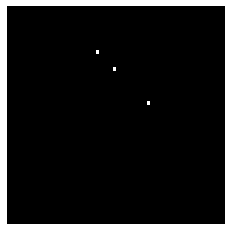

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage.transform import hough_line, hough_line_peaks
import os

if not os.path.exists("kwadraty.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/11_Hough/kwadraty.png --no-check-certificate
if not os.path.exists("lab112.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/11_Hough/lab112.png --no-check-certificate
if not os.path.exists("dom.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/11_Hough/dom.png --no-check-certificate

I_kwadraty = cv2.imread('kwadraty.png', cv2.IMREAD_GRAYSCALE)
I_lab112 = cv2.imread('lab112.png', cv2.IMREAD_GRAYSCALE)
I_dom = cv2.imread('dom.png', cv2.IMREAD_GRAYSCALE)

im = np.zeros((64,64), dtype=np.uint8)

im[13, 26] = 1
im[18, 31] = 1
im[28, 41] = 1

fig, ax = plt.subplots()
fig.set_size_inches(4, 4)
ax.imshow(im, 'gray')
ax.axis('off')


3. Wykonaj transformację Hougha obazu im. Wykorzystaj funkcję *hough_line* z modułu _skimage.transform_. Funkcja zwraca: macierz H (przestrzeń Hougha) oraz dwa wektory theta i rho dla kolejnych 
4. Wyświetl przestrzeń Hougha za pomocą funkcji _plt.imshow_ (można też wykorzystać poniższą funkcję *show_hough*). Jak "wygląda" pojedynczy punkt w przestrzeni Hougha?

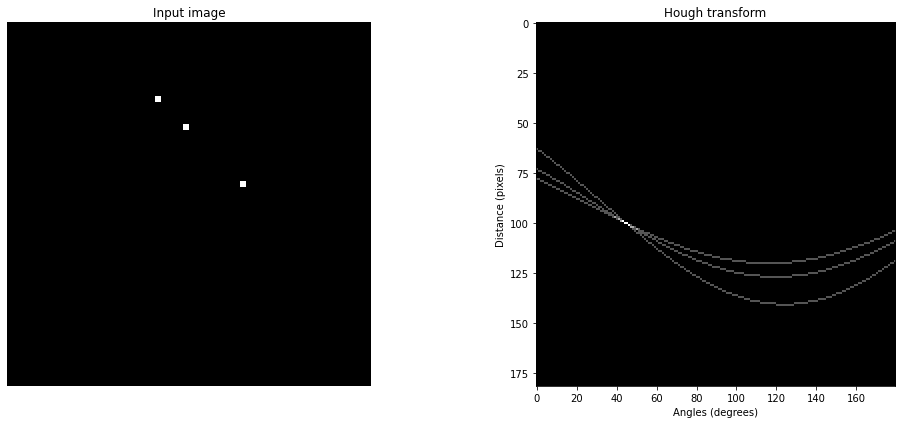

In [2]:
def show_hough(h, image):
    # Generating figure 1
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    ax = axes.ravel()

    ax[0].imshow(image, 'gray')
    ax[0].set_title('Input image')
    ax[0].set_axis_off()

    ax[1].imshow(h, 'gray')
    ax[1].set_title('Hough transform')
    ax[1].set_xlabel('Angles (degrees)')
    ax[1].set_ylabel('Distance (pixels)')
    ax[1].axis('image')
    
    plt.tight_layout()
    plt.show()

# ppkt 3
I_Hough, _, _ = hough_line(im)

# ppkt 4
show_hough(I_Hough, im)

5. Powtórz punkty 1-4, ale tym razem klinkij dwa punkty. Jak zmienia się przestrzeń Hougha?
6. Powtórz punkty 1-4, ale tym razem kliknij kilka punktów starając się aby były współliniowe. Zaobserwuj zmiany w przestrzeni Hougha
7. Poeksperymentuj z różnymi układami punktów

### Transformata Hougha dla pojedynczego obiektu

W tym podpunkcie pokazane zostanie praktycznie wykorzystanie transformaty Hougha - do detekcji prostych na sztucznym rysunku.

   1. Wczytaj obraz "kwadraty.png". Wyświetl go.
   2. Wykonaj detekcję krawędzi jedną z metod gradientowych. Ważne aby obraz krawędzi był jak najlepszej jakości - co oznacza cienkie (nawet niekoniecznie ciągłe) krawędzie - dla tego przypadku nie powinno być trudne do uzyskania. Wyświetl obraz po detekcji krawędzi.
   3. Wykonaj transformatę Hougha obrazu krawędziowego. Wykorzystaj funkcję *hough\_line*.
   4. Wyświetl macierz H. Czy widoczna jest taka liczba maksimów jakiej się spodziewamy?

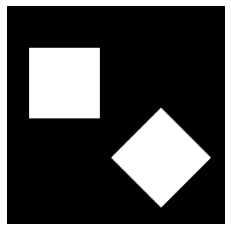

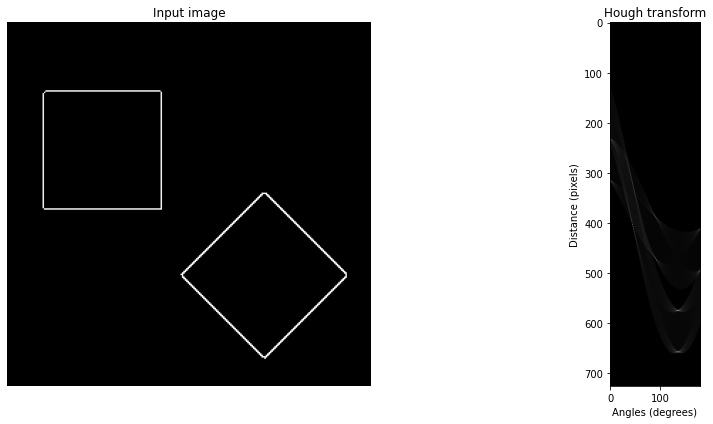

In [3]:
# ppkt 1
plt.imshow(I_kwadraty, 'gray')
plt.axis('off')
plt.show()

# ppkt 2
tl=100
th=200
I_kwadraty_canny = cv2.Canny(I_kwadraty, tl, th)

# ppkt 3
I_Hough, theta, rho = hough_line(I_kwadraty_canny)

# ppkt 4
show_hough(I_Hough, I_kwadraty_canny)
#tak, 8

 5. W module skimage.transform dostępna jest funkcja do automatycznej analizy przestrzeni Hougha - wyszukiwania maksimów - *hough\_line\_peaks*. Jako parametry przyjmuje ona wyniki funkcji *hough\_line* (macierz H, theta i rho). Dodatkowo można podać próg powyżej którego punkt uznawany jest za maksimum (_threshold_ - domyslnie jest to połowa maksimum w przestrzeni H) oraz liczbę poszukiwanych maksimów (*num_peaks*). Funkcja zwraca współrzędne maksimów. Wykorzystaj funkcję *hough\_line\_peaks* do znalezienia maksimów odpowiadających krawędziom kwadratów.
 6. Wyświetl macierz H używając konstrukcji:

In [4]:
# przeniesione niżej

Taki zapis pozwoli na dołożenie annotacji (okręgów) w miejscach znalezionych maksimów. Wyrysowanie okręgu w punkcie x, y (o rozmiarze 10, w czerwonym kolorze, bez wypełnienia środka) realizuje wywołanie: 

**circle = plt.Circle((x, y), 10, color='r', fill=False)**

natomiast dołożenie takiego okręgu do obrazu to:

**ax.add_patch(circle)**

Zaznacz maksima na obrazie wykorzystując rezultat funkcji *hough\_line\_peaks* biorąc pod uwagę, że zwraca ona kąty w radianach z przedziału od -pi/2 do pi/2, a rho z przedziału od -r/2 do r/2 gdzie r to pionowy rozmiar przestrzeni Hougha. 

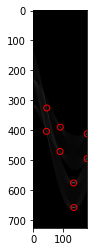

In [5]:
# ppkt 5
I_Hough_peaks = hough_line_peaks(I_Hough, theta, rho)

# ppkt 6
fig,ax = plt.subplots(1)
ax.set_aspect('equal')
for i in range(len(I_Hough_peaks[0])):
    circle = plt.Circle((np.rad2deg(I_Hough_peaks[1][i] + np.pi/2), I_Hough_peaks[2][i] + I_Hough.shape[0]/2), 10, color='r', fill=False)
    ax.add_patch(circle)

ax.imshow(I_Hough, 'gray') # gdzie H jest przestrzenią Hougha


7. Istnieje też możliwość przeprowadzenia transformacji Hougha z użyciem biblioteki OpenCV. W bibliotece znajdują się dwie wersje funkcji wyszukującej linie proste - 'klasyczna' - _HoughLines_ oraz probabilistyczna _HoughLinesP_. Zadna z nich nie zwraca przestrzeni Hougha. Wynikiem działania pierwszej jest lista parametrów prostych (krotki zawierające rho, theta). Druga zwraca krotki 4-ro elementowe ze współrzędnymi końców odcinków wykorzystanych do wylicznia parametrów (czyli znalezienia prostej). 
8. Wyznacz linie obecne na obrazie za pomocą funkcji _HoughLines_. Wykryte linie wyrysuj na obrazie początkowym (UWAGA: wczytanym bez konwersji na graylevel). Do wyświetlania linii wykorzystaj przykładowy kod:

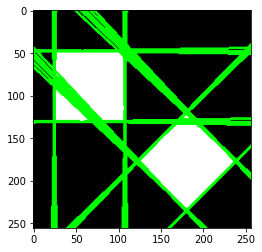

In [6]:
# ppkt 8
I_kwadraty_nie_szare = cv2.imread('kwadraty.png')
I_kwadraty_canny = cv2.Canny(I_kwadraty_nie_szare, 0, 1)
lines = cv2.HoughLines(I_kwadraty_canny, 1, np.pi / 180, 40)

for i in range(0, len(lines)):
      for rho, theta in lines[i]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*a)
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*a)
        cv2.line(I_kwadraty_nie_szare, (x1, y1), (x2, y2), (0, 255, 0), 2)

plt.imshow(I_kwadraty_nie_szare)

9. Wyznacz odcinki obecne na obrazie za pomocą funkcji _HoughLinesP_. Wykryte odcinki wyrysuj na obrazie początkowym (UWAGA: wczytanym bez konwersji na graylevel). 

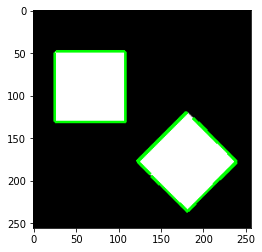

In [7]:
# ppkt 9
I_kwadraty_nie_szare = cv2.imread('kwadraty.png')
I_kwadraty_canny = cv2.Canny(I_kwadraty_nie_szare, 0, 1)
lines_P = cv2.HoughLinesP(I_kwadraty_canny, 1, np.pi / 180, 30, 10, 10)
for i in range(0, len(lines_P)):
    l = lines_P[i][0]
    cv2.line(I_kwadraty_nie_szare, (l[0], l[1]), (l[2], l[3]), (0, 255, 0), 2)
plt.imshow(I_kwadraty_nie_szare)

### Transformata Hougha dla obrazu rzeczywistego.

Bazując na kodzie stworzonym w punkcie B wyszukamy linie na obrazie rzeczywistym.
   1. Wczytaj obraz "lab112.png". Wyświetl go.
   2. Wykorzystując wszystkie poznane techniki przetwarzania obrazów (filtracja, przekształcenia morfologiczne, binaryzację, detekcję krawędzi) wyodrębnij krawędzie samych kwadratów - tak aby były jak najlepszej jakości (cienkie) - jednocześnie eliminując z obrazu zakłócenia.
   3. Wykorzystaj funkcje *hough_line* i *hough_line_peaks* do detekcji linii na obrazie, a następnie np. wykorzystując kod z punktu 8 poprzedniego ustępu wyrysuj na oryginalnym obrazie znalezione linie.

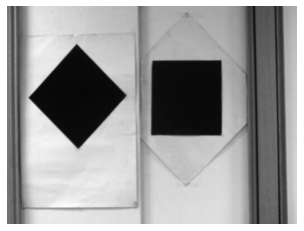

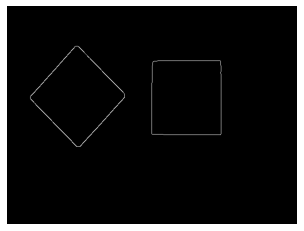

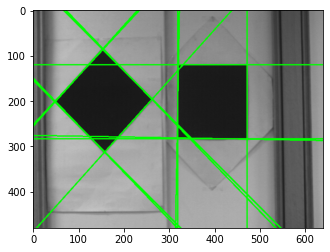

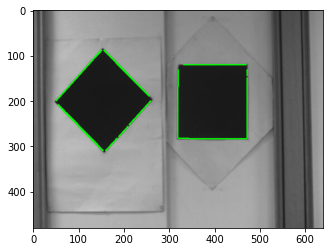

In [8]:
# ppkt 1
plt.imshow(I_lab112, 'gray')
plt.axis('off')
plt.show()

# ppkt 2
# - binaryzacja
# - zamknięcie
# - canny
_, I_binaryzacja = cv2.threshold(I_lab112, 50, 255, cv2.THRESH_BINARY)
I_zamkniecie = cv2.morphologyEx(I_binaryzacja, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_RECT, (7,7)))
I_canny = cv2.Canny(I_zamkniecie, 0, 1)
I_wynik = I_canny

plt.imshow(I_wynik, 'gray')
plt.axis('off')
plt.show()

# ppkt 3
I_lab112_nie_szare = cv2.imread('lab112.png')
lines = cv2.HoughLines(I_wynik, 1, np.pi / 180, 70)
for i in range(0, len(lines)):
      for rho, theta in lines[i]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*a)
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*a)
        cv2.line(I_lab112_nie_szare, (x1, y1), (x2, y2), (0, 255, 0), 2)
plt.imshow(I_lab112_nie_szare)
plt.show()

I_lab112_nie_szare = cv2.imread('lab112.png')
lines_P = cv2.HoughLinesP(I_wynik, 1, np.pi / 180, 20, 10, 10)
for i in range(0, len(lines_P)):
    l = lines_P[i][0]
    cv2.line(I_lab112_nie_szare, (l[0], l[1]), (l[2], l[3]), (0, 255, 0), 2)
plt.imshow(I_lab112_nie_szare)
plt.show()

4. Wczytaj obraz "dom.png". Wypróbuj działanie transformacji Hougha na tym obrazie z wykorzystaniem funkcji _cv2.HoughLinesP_  (oczywiście po odpowiednich przekształceniach). Postaraj się tak przygotować obraz z krawędziami i dobrać parametry aby wyrysować na oryginalnym obrazie odcinki obejmujące zarysy domu. Weź pod uwage dodatkowe parametry funkcji, takie jak:   minLineLength, maxLineGap.

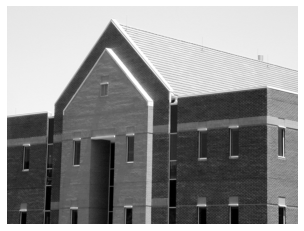

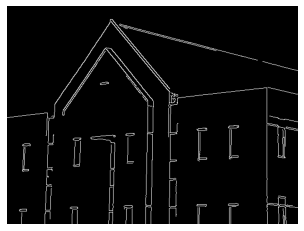

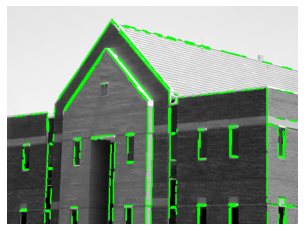

In [9]:
# ppkt 4
plt.imshow(I_dom, 'gray')
plt.axis('off')
plt.show()

# początek kodu z labek nr 9
I_dom_gauss = cv2.GaussianBlur(I_dom, (3,3), 1.4) # filtracja dwuwymiarowym filtrem Gaussa
gradient_x = cv2.Sobel(np.float32(I_dom_gauss),cv2.CV_64F,1,0,ksize=3)
gradient_y = cv2.Sobel(np.float32(I_dom_gauss),cv2.CV_64F,0,1,ksize=3)

amplituda = np.sqrt(gradient_x**2 + gradient_y**2)
kat_radiany = np.arctan2(gradient_y, gradient_x)
# amplituda, kat_radiany = cv2.cartToPolar(gradient_x, gradient_y)

kat_stopnie = np.rad2deg(kat_radiany)

dang = np.zeros(I_dom.shape)
amplituda_kopia = amplituda.copy()
for i in range(I_dom.shape[0]):
    for j in range (I_dom.shape[1]):
        grad_ang = kat_stopnie[i, j]
        if 22.5 >= grad_ang >= -22.5 or grad_ang <= -157.5 or grad_ang >= 157.5:
            dang[i,j] = 1
            neighb_1 = i, j-1
            neighb_2 = i, j+1
        elif 67.5 >= grad_ang >= 22.5 or -112.5 >= grad_ang >= -157.5:
            dang[i,j] = 2
            neighb_1 = i - 1, j - 1
            neighb_2 = i + 1, j + 1
        elif 112.5 >= grad_ang >= 67.5 or -67.5 >= grad_ang >= -112.5:
            dang[i,j] = 3
            neighb_1 = i-1, j
            neighb_2 = i+1, j
        elif 157.5 >= grad_ang >= 112.5 or -22.5 >= grad_ang >= -67.5:
            dang[i,j] = 4
            neighb_1 = i + 1, j - 1
            neighb_2 = i - 1, j + 1

        if I_dom.shape[0]>neighb_1[0]>=0 and I_dom.shape[1]>neighb_1[1]>=0:
            if amplituda[i, j] < amplituda[neighb_1[0], neighb_1[1]]:
                amplituda_kopia[i, j]= 0
                continue
        if I_dom.shape[0]>neighb_2[0]>=0 and I_dom.shape[1]>neighb_2[1]>=0:
            if amplituda[i, j] < amplituda[neighb_2[0], neighb_2[1]]:
                amplituda_kopia[i, j]= 0

tl=100
th=200
gnh = amplituda_kopia >= th # pewnie krawędzie
gnl = np.zeros(I_dom.shape, dtype=bool) #potencjalne krawędzie

for i in range(I_dom.shape[0]):
    for j in range (I_dom.shape[1]):
        if th >= amplituda_kopia[i,j] >= tl:
            gnl[i,j] = True
        else:
            gnl[i,j] = False
lista = []
for i in range(I_dom.shape[0]):
    for j in range (I_dom.shape[1]):
        if gnh[i,j]: lista.append([i,j])
czy_odwiedzony = np.full(I_dom.shape, False, dtype=bool)
wynikowe_krawedzie = np.zeros(I_dom.shape)

while len(lista)!=0:
    element_ze_stosu = lista.pop()
    if not czy_odwiedzony[element_ze_stosu[0], element_ze_stosu[1]]:
        czy_odwiedzony[element_ze_stosu[0], element_ze_stosu[1]] = True
        wynikowe_krawedzie[element_ze_stosu[0], element_ze_stosu[1]] = 1
        for i in range(element_ze_stosu[0]-1,element_ze_stosu[0]+2):
            for j in range (element_ze_stosu[1]-1,element_ze_stosu[1]+2):
                if I_dom.shape[0]>i>=0 and I_dom.shape[1]>j>=0:
                    if gnl[i,j]: lista.append([i,j])

plt.imshow(wynikowe_krawedzie, 'gray')
plt.axis('off')
plt.show()

# koniec kodu z labek nr 9

I_dom_nie_szare = cv2.imread('dom.png')
lines_P = cv2.HoughLinesP(wynikowe_krawedzie.astype(np.uint8), 1, np.pi / 180, 20, 20, 4)
for i in range(0, len(lines_P)):
    l = lines_P[i][0]
    cv2.line(I_dom_nie_szare, (l[0], l[1]), (l[2], l[3]), (0, 255, 0), 2)
plt.imshow(I_dom_nie_szare)
plt.axis('off')
plt.show()
